# Wczytywanie danych

In [2]:
import numpy as np
import pandas as pd

tshirts = pd.read_csv('t-shirts.csv')

tshirts_df = pd.DataFrame(tshirts)

print(tshirts_df.head(10))

print()

print(tshirts_df.describe(include='all'))

  size   material   color sleeves  demand
0    S      nylon   white    long  medium
1   XL  polyester   cream   short    high
2    S       silk    blue   short  medium
3    M     cotton   black   short  medium
4   XL  polyester  orange    long  medium
5   XS  polyester   black   short  medium
6  XXL  polyester   green   short  medium
7    L      linen  yellow   short    high
8   XL      linen   cream    long    high
9   XS      nylon     red   short    high

         size material  color sleeves demand
count   20000    20000  20000   20000  20000
unique      7        5     10       2      3
top         L    nylon  white    long   high
freq     4408     5652   3286   10117   8965


# Wizualizacja danych
## Rozkłady rozmiaru, materiału, koloru, rękawów oraz zapotrzebowania


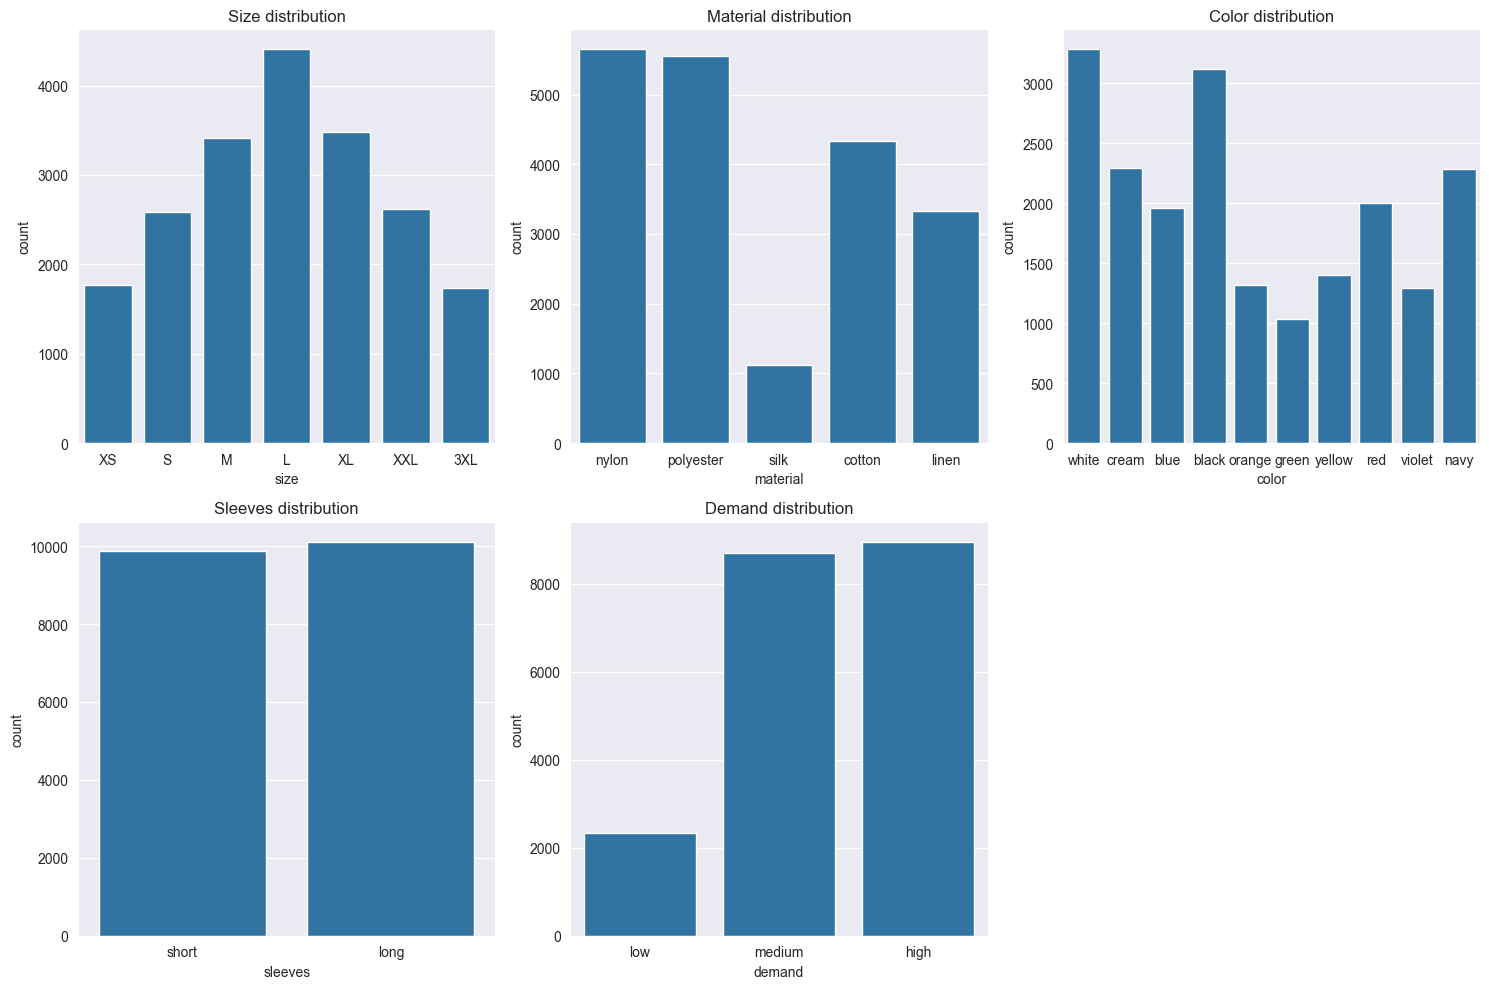

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='size', data=tshirts_df, order=['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL'])
plt.title('Size distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='material', data=tshirts_df, order=['nylon', 'polyester', 'silk', 'cotton', 'linen'])
plt.title('Material distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='color', data=tshirts_df, order=['white', 'cream', 'blue', 'black', 'orange', 'green', 'yellow', 'red', 'violet', 'navy'])
plt.title('Color distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='sleeves', data=tshirts_df, order=['short', 'long'])
plt.title('Sleeves distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='demand', data=tshirts_df, order=['low', 'medium', 'high'])
plt.title('Demand distribution')

plt.tight_layout()
plt.show()

## Korelacje pomiędzy zapotrzebowaniem i innymi metrykami

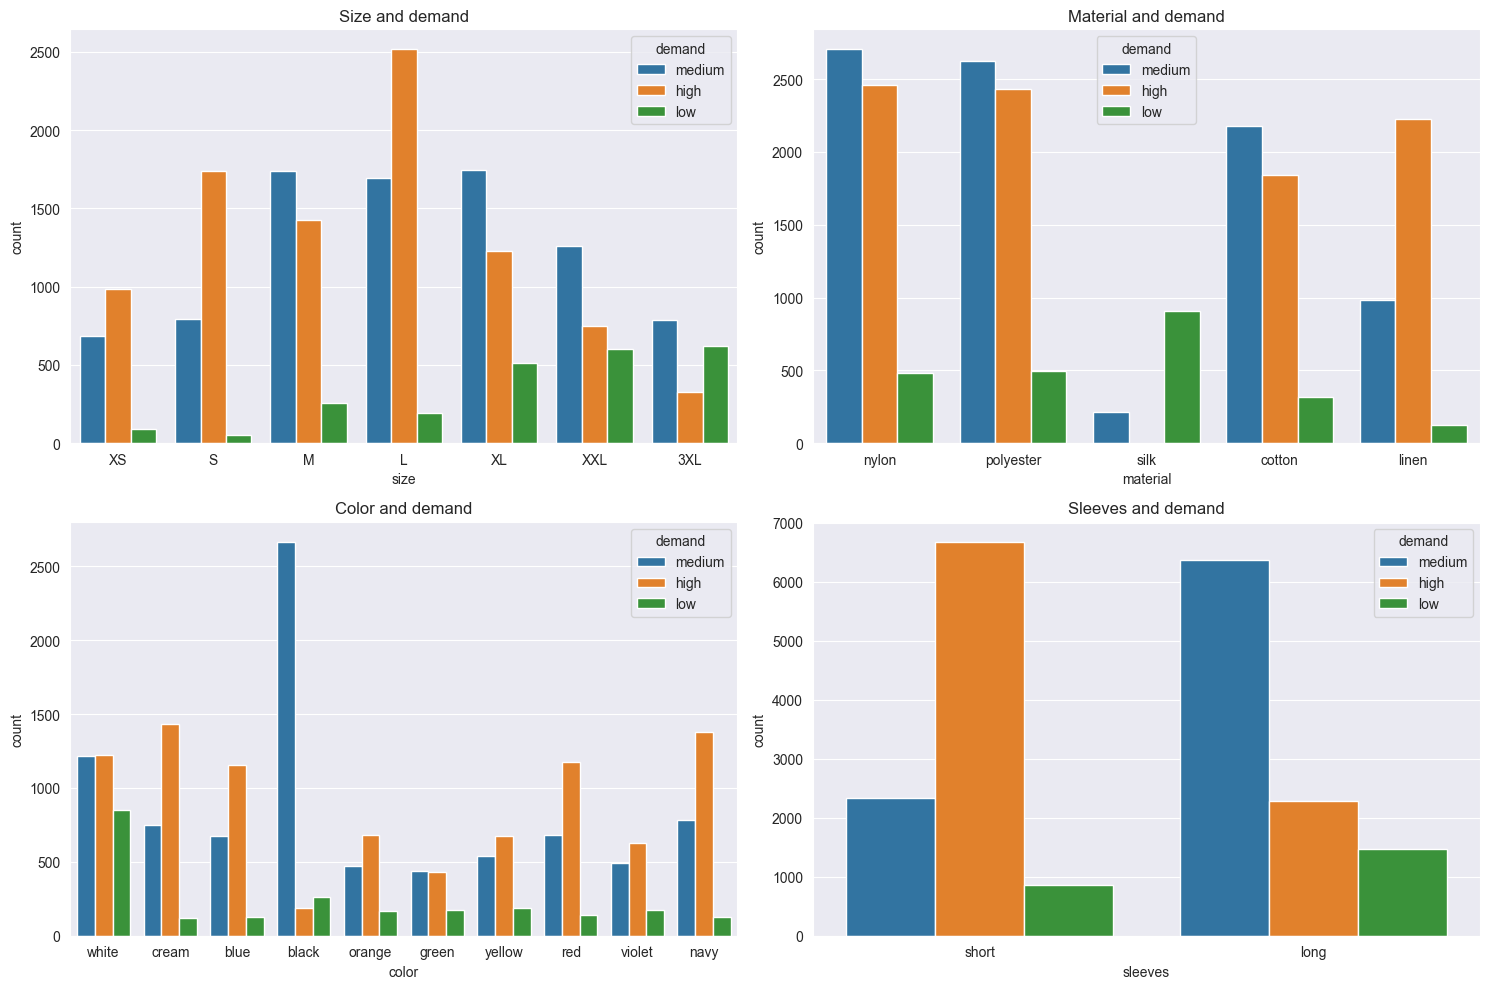

In [4]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='size', hue='demand', data=tshirts_df, order=['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL'])
plt.title('Size and demand')

plt.subplot(2, 2, 2)
sns.countplot(x='material', hue='demand', data=tshirts_df, order=['nylon', 'polyester', 'silk', 'cotton', 'linen'])
plt.title('Material and demand')

plt.subplot(2, 2, 3)
sns.countplot(x='color', hue='demand', data=tshirts_df, order=['white', 'cream', 'blue', 'black', 'orange', 'green', 'yellow', 'red', 'violet', 'navy'])
plt.title('Color and demand')

plt.subplot(2, 2, 4)
sns.countplot(x='sleeves', hue='demand', data=tshirts_df, order=['short', 'long'])
plt.title('Sleeves and demand')

plt.tight_layout()
plt.show()

## Macierz korelacji

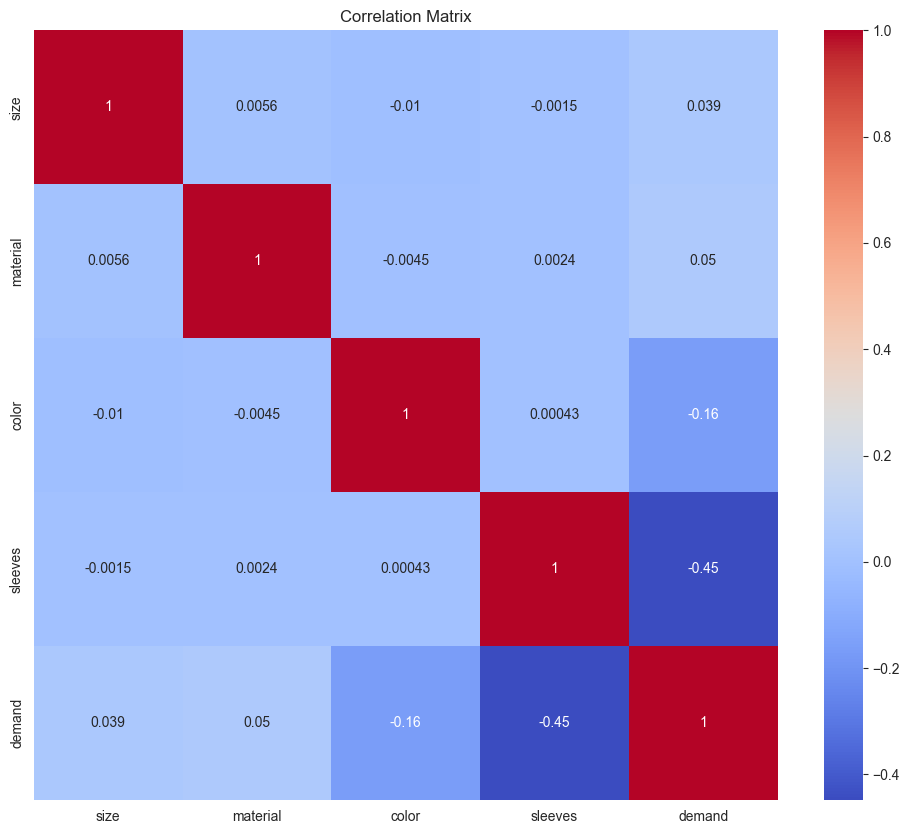

   size  material  color  sleeves  demand
0     3         2      8        0       2
1     4         3      2        1       0
2     3         4      1        1       2
3     2         0      0        1       2
4     4         3      5        0       2
5     5         3      0        1       2
6     6         3      3        1       2
7     1         1      9        1       0
8     4         1      2        0       0
9     5         2      6        1       0


In [6]:
from sklearn.preprocessing import LabelEncoder

tshirts = pd.read_csv('t-shirts.csv')
tshirts_df = pd.DataFrame(tshirts)

label_encoders = {}
for column in tshirts_df.columns:
    le = LabelEncoder()
    tshirts_df[column] = le.fit_transform(tshirts_df[column])
    label_encoders[column] = le

corr_matrix = tshirts_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

print(tshirts_df.head(10))

# Dzielenie zbioru danych na zbiór treningowy i walidacyjny

Spośród zaproponowanych metod przetwarzania danych (normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) metody dyskretyzacji i selekcji cech nie mają zastosowania w przypadku tego zbioru danych. W przypadku dyskretyzacji, wszystkie dane są już dyskretyzowane, a w przypadku selekcji cech, nie posiadamy wielu cech i wszystkie są istotne dla modelu. PCA również nie ma zastosowania, ponieważ nie ma sensu redukować wymiarów zbioru danych, który ma tylko 5 kolumn. Zatem pozostają dwie metody: normalizacja i standaryzacja.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = tshirts_df.drop('demand', axis=1)
y = tshirts_df['demand']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

processed_x_train = X_train.copy()
processed_x_val = X_val.copy()

scaler = StandardScaler()
processed_x_train = scaler.fit_transform(processed_x_train)
processed_x_val = scaler.transform(processed_x_val)

print(processed_x_train)
print()

processed2_x_train = X_train.copy()
processed2_x_val = X_val.copy()

scaler = MinMaxScaler()
processed2_x_train = scaler.fit_transform(processed2_x_train)
processed2_x_val = scaler.transform(processed2_x_val)


print(processed2_x_train)


[[ 1.66463121 -0.64894067  1.54444881 -0.98328257]
 [-1.52271827  0.99009404  0.56060409 -0.98328257]
 [-0.99149336 -0.64894067  0.56060409  1.01700165]
 ...
 [ 0.60218138  0.99009404 -0.75118887 -0.98328257]
 [-0.99149336  0.17057668 -1.07913711  1.01700165]
 [ 0.07095647 -0.64894067 -0.09529239  1.01700165]]

[[1.         0.25       1.         0.        ]
 [0.         0.75       0.66666667 0.        ]
 [0.16666667 0.25       0.66666667 1.        ]
 ...
 [0.66666667 0.75       0.22222222 0.        ]
 [0.16666667 0.5        0.11111111 1.        ]
 [0.5        0.25       0.44444444 1.        ]]


# Brakujące dane

In [8]:
tshirts_missing_df = tshirts_df.copy()

np.random.seed(42)
missing_mask = np.random.rand(*tshirts_missing_df.shape) < 0.06
tshirts_missing_df[missing_mask] = np.nan

print(tshirts_missing_df.head(10))

   size  material  color  sleeves  demand
0   3.0       2.0    8.0      0.0     2.0
1   4.0       NaN    2.0      1.0     0.0
2   NaN       4.0    1.0      1.0     2.0
3   2.0       0.0    0.0      1.0     2.0
4   4.0       3.0    5.0      0.0     2.0
5   5.0       3.0    0.0      1.0     NaN
6   6.0       3.0    3.0      1.0     2.0
7   1.0       1.0    9.0      1.0     0.0
8   4.0       1.0    NaN      0.0     0.0
9   5.0       2.0    6.0      1.0     0.0


In [10]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='median')
tshirts_df_mean_imputed = imputer_mean.fit_transform(tshirts_missing_df)

print(pd.DataFrame(tshirts_df_mean_imputed, columns=tshirts_df.columns).head(10))

   size  material  color  sleeves  demand
0   3.0       2.0    8.0      0.0     2.0
1   4.0       2.0    2.0      1.0     0.0
2   3.0       4.0    1.0      1.0     2.0
3   2.0       0.0    0.0      1.0     2.0
4   4.0       3.0    5.0      0.0     2.0
5   5.0       3.0    0.0      1.0     1.0
6   6.0       3.0    3.0      1.0     2.0
7   1.0       1.0    9.0      1.0     0.0
8   4.0       1.0    4.0      0.0     0.0
9   5.0       2.0    6.0      1.0     0.0


# Klasyfikacja

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## Naive Bayes

Naive Bayes to rodzina prostych algorytmów klasyfikacyjnych opartych na twierdzeniu Bayesa z założeniem niezależności między cechami. Nazwa "naiwny" pochodzi od tego założenia o niezależności, które w praktyce jest często nieprawdziwe, ale mimo to algorytm działa bardzo dobrze w wielu rzeczywistych zastosowaniach.
Twierdzenie Bayesa opisuje zależność prawdopodobieństwa warunkowego między dwoma zdarzeniami.

Gaussian Naive Bayes zakłada, że cechy mają rozkład normalny (Gaussa). Jest często używany dla danych ciągłych.





Naive Bayes jest jednym z najprostszych klasyfikatorów, który zakłada niezależność cech. W przypadku tego zbioru danych, cechy nie są zbyt skorelowane, więc ten klasyfikator powinien działać dobrze.

In [30]:
nb_model = GaussianNB()

nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

nb_grid = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train, y_train)

print("Best parameters for Naive Bayes:", nb_grid.best_params_)
nb_best_model = nb_grid.best_estimator_
nb_predictions = nb_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, nb_predictions))
print(classification_report(y_val, nb_predictions))

Best parameters for Naive Bayes: {'var_smoothing': 0.01}
Accuracy: 0.679
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      2730
           1       0.84      0.08      0.14       668
           2       0.64      0.76      0.69      2602

    accuracy                           0.68      6000
   macro avg       0.73      0.53      0.52      6000
weighted avg       0.70      0.68      0.65      6000



In [31]:
import warnings

results = pd.DataFrame(nb_grid.cv_results_)

warnings.filterwarnings('ignore')

for i, params in enumerate(results['params']):
    print(f"Results for parameters: {params}")
    mean_test_score = results.loc[i, 'mean_test_score']
    std_test_score = results.loc[i, 'std_test_score']
    print(f"Mean Test Accuracy: {mean_test_score:.4f}")
    print(f"Standard Deviation of Test Accuracy: {std_test_score:.4f}")

    model = GaussianNB(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    accuracy = accuracy_score(y_val, predictions)
    report = classification_report(y_val, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")


Results for parameters: {'var_smoothing': 1e-09}
Mean Test Accuracy: 0.6576
Standard Deviation of Test Accuracy: 0.0095
Validation Accuracy: 0.6707
Precision: 0.6862
Recall: 0.6707
F1-Score: 0.6420


Results for parameters: {'var_smoothing': 1e-08}
Mean Test Accuracy: 0.6576
Standard Deviation of Test Accuracy: 0.0095
Validation Accuracy: 0.6707
Precision: 0.6862
Recall: 0.6707
F1-Score: 0.6420


Results for parameters: {'var_smoothing': 1e-07}
Mean Test Accuracy: 0.6576
Standard Deviation of Test Accuracy: 0.0095
Validation Accuracy: 0.6707
Precision: 0.6862
Recall: 0.6707
F1-Score: 0.6420


Results for parameters: {'var_smoothing': 1e-06}
Mean Test Accuracy: 0.6576
Standard Deviation of Test Accuracy: 0.0095
Validation Accuracy: 0.6707
Precision: 0.6862
Recall: 0.6707
F1-Score: 0.6420


Results for parameters: {'var_smoothing': 1e-05}
Mean Test Accuracy: 0.6576
Standard Deviation of Test Accuracy: 0.0095
Validation Accuracy: 0.6707
Precision: 0.6862
Recall: 0.6707
F1-Score: 0.6420




## Decision Tree

In [34]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 7, 10]
}

dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid.best_params_)
dt_best_model = dt_grid.best_estimator_
dt_predictions = dt_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, dt_predictions))
print(classification_report(y_val, dt_predictions))

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2730
           1       0.94      0.94      0.94       668
           2       0.97      0.97      0.97      2602

    accuracy                           0.97      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.97      0.97      0.97      6000



In [37]:
dt_results = pd.DataFrame(dt_grid.cv_results_)

for i, params in enumerate(dt_results['params']):
    print(f"Results for parameters: {params}")
    mean_test_score = dt_results.loc[i, 'mean_test_score']
    std_test_score = dt_results.loc[i, 'std_test_score']
    print(f"Mean Test Accuracy: {mean_test_score:.4f}")
    print(f"Standard Deviation of Test Accuracy: {std_test_score:.4f}")

    model = DecisionTreeClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    accuracy = accuracy_score(y_val, predictions)
    report = classification_report(y_val, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Test Accuracy: 0.9699
Standard Deviation of Test Accuracy: 0.0012
Validation Accuracy: 0.9720
Precision: 0.9720
Recall: 0.9720
F1-Score: 0.9720


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Test Accuracy: 0.9699
Standard Deviation of Test Accuracy: 0.0012
Validation Accuracy: 0.9720
Precision: 0.9720
Recall: 0.9720
F1-Score: 0.9720


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Test Accuracy: 0.9697
Standard Deviation of Test Accuracy: 0.0016
Validation Accuracy: 0.9713
Precision: 0.9714
Recall: 0.9713
F1-Score: 0.9713


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
Mean Test Accuracy: 0.9680
Standard Deviation of Test Accuracy: 0.0025
Validation Accuracy: 0.9713
Precision: 0.9714
Recall: 0.9713
F1-Score: 0.9713


Results for parameters: {'max_

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid.best_params_)
rf_best_model = rf_grid.best_estimator_
rf_predictions = rf_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, rf_predictions))
print(classification_report(y_val, rf_predictions))


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.9698333333333333
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2730
           1       0.94      0.93      0.93       668
           2       0.96      0.98      0.97      2602

    accuracy                           0.97      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.97      0.97      0.97      6000



In [40]:
rf_results = pd.DataFrame(rf_grid.cv_results_)

for i, params in enumerate(rf_results['params']):
    print(f"Results for parameters: {params}")
    mean_test_score = rf_results.loc[i, 'mean_test_score']
    std_test_score = rf_results.loc[i, 'std_test_score']
    print(f"Mean Test Accuracy: {mean_test_score:.4f}")
    print(f"Standard Deviation of Test Accuracy: {std_test_score:.4f}")

    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    accuracy = accuracy_score(y_val, predictions)
    report = classification_report(y_val, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Test Accuracy: 0.9703
Standard Deviation of Test Accuracy: 0.0015
Validation Accuracy: 0.9702
Precision: 0.9704
Recall: 0.9702
F1-Score: 0.9702


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Test Accuracy: 0.9703
Standard Deviation of Test Accuracy: 0.0015
Validation Accuracy: 0.9702
Precision: 0.9704
Recall: 0.9702
F1-Score: 0.9702


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean Test Accuracy: 0.9704
Standard Deviation of Test Accuracy: 0.0015
Validation Accuracy: 0.9705
Precision: 0.9707
Recall: 0.9705
F1-Score: 0.9705


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Test Accuracy: 0.9704
Standard Deviation of Test Accuracy: 0.0015
Validation Accuracy: 0.9703
Pr

# Metryki

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

def train_and_evaluate(model, X_val, y_val):
    predictions = model.predict(X_val)
    
    cm = confusion_matrix(y_val, predictions)
    
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, average='weighted')
    recall = recall_score(y_val, predictions, average='weighted')
    f1 = f1_score(y_val, predictions, average='weighted')
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    # print("\nClassification Report:\n", classification_report(y_val, predictions))
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return model, accuracy, precision, recall, f1

## Naive Bayes bez skalowania

Accuracy: 0.679
Precision: 0.6972069370391933
Recall: 0.679
F1-Score: 0.6506694768031549


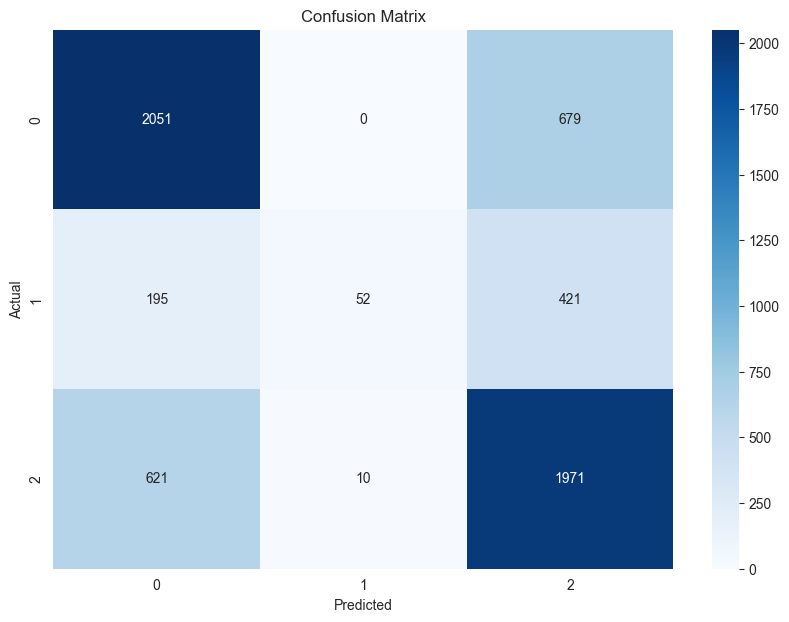

In [42]:
nb_model = GaussianNB(var_smoothing=0.01)
nb_model.fit(X_train, y_train)

_, nb_accuracy, nb_precision, nb_recall, nb_f1 = train_and_evaluate(nb_model, X_val, y_val)

## Naive Bayes z Standard Scaler

Accuracy: 0.6703333333333333
Precision: 0.6864917781029755
Recall: 0.6703333333333333
F1-Score: 0.6410710260061223


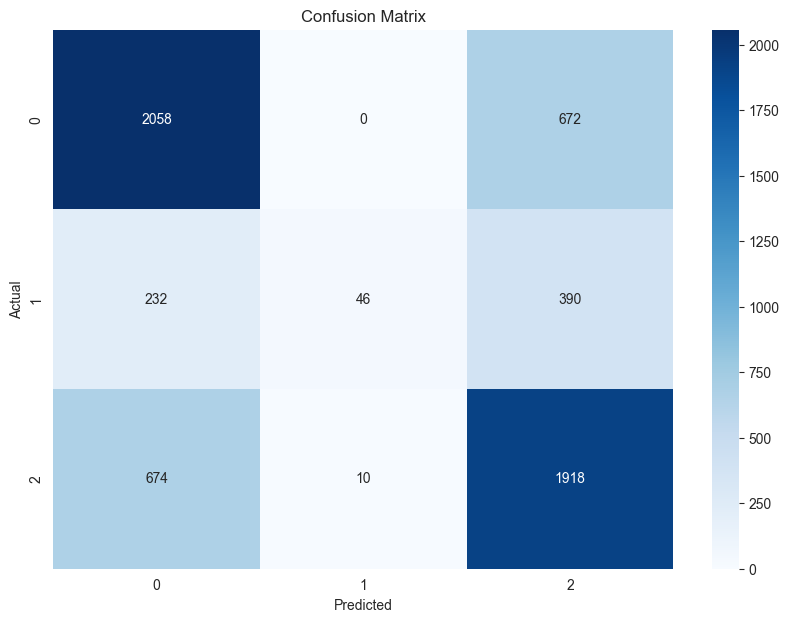

In [43]:
nb_model = GaussianNB(var_smoothing=0.01)
nb_model.fit(processed_x_train, y_train)

_, nb_accuracy, nb_precision, nb_recall, nb_f1 = train_and_evaluate(nb_model, processed_x_val, y_val)

## Naive Bayes z MinMax Scaler

Accuracy: 0.6666666666666666
Precision: 0.6820361020830477
Recall: 0.6666666666666666
F1-Score: 0.636988974277132


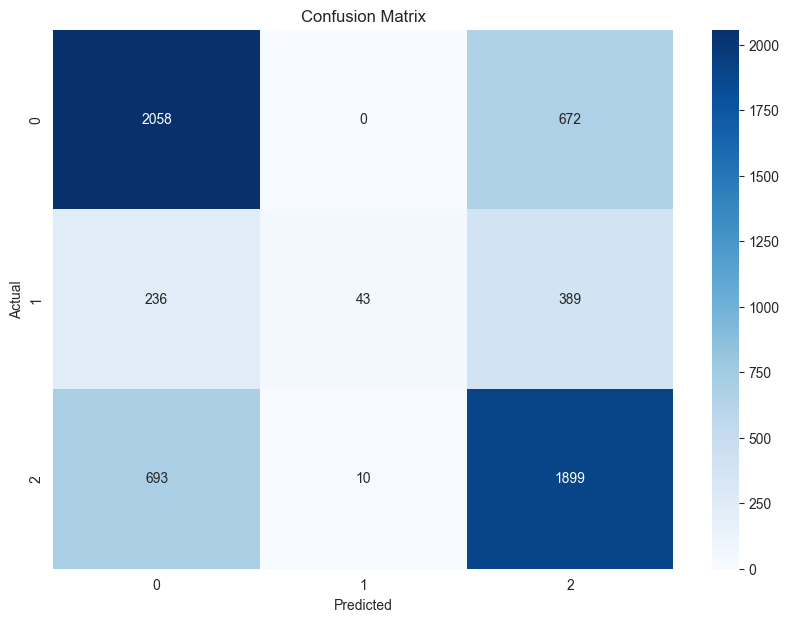

In [44]:
nb_model = GaussianNB(var_smoothing=0.01)
nb_model.fit(processed2_x_train, y_train)

_, nb_accuracy, nb_precision, nb_recall, nb_f1 = train_and_evaluate(nb_model, processed2_x_val, y_val)

## Decision Tree bez skalowania

Accuracy: 0.972
Precision: 0.9720191175070854
Recall: 0.972
F1-Score: 0.9720040866068879


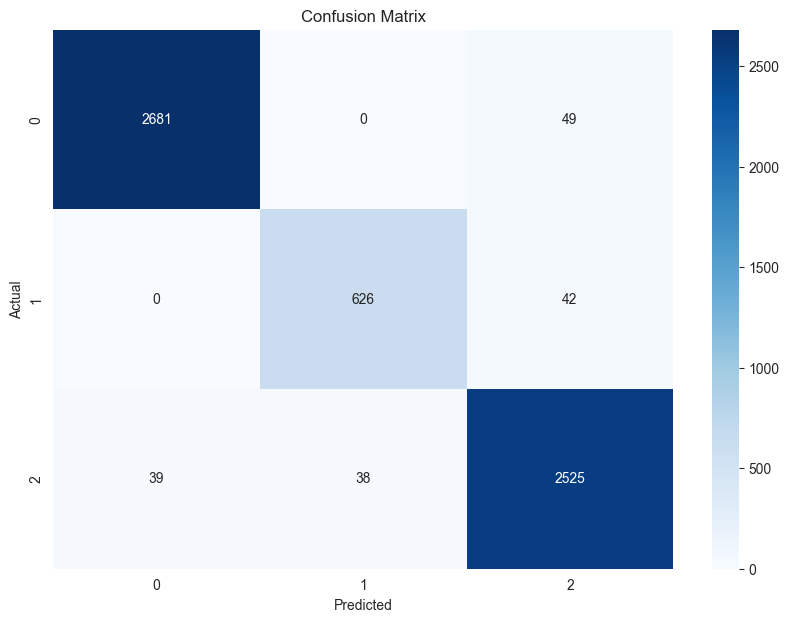

In [18]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)

_, dt_accuracy, dt_precision, dt_recall, dt_f1 = train_and_evaluate(dt_model, X_val, y_val)

## Decision Tree z Standard Scaler

Accuracy: 0.972
Precision: 0.9720191175070854
Recall: 0.972
F1-Score: 0.9720040866068879


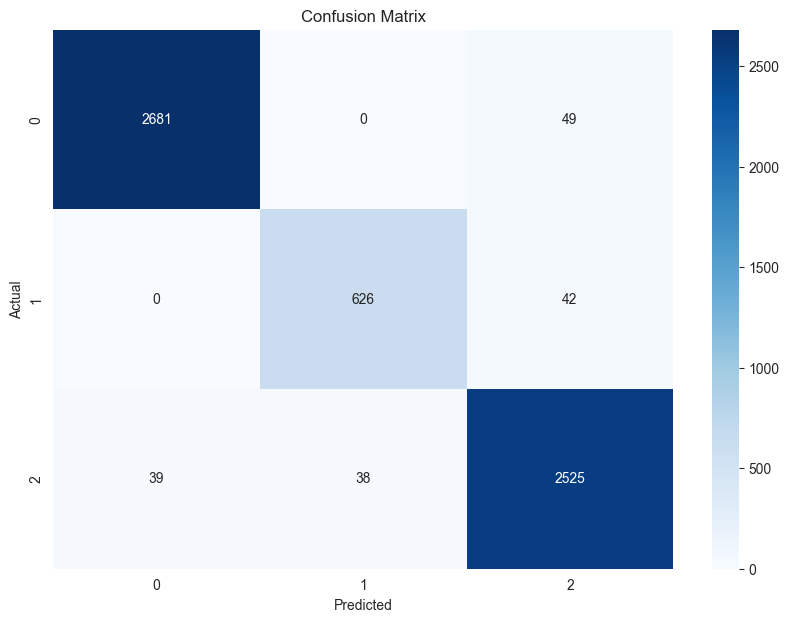

In [19]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(processed_x_train, y_train)

_, dt_accuracy, dt_precision, dt_recall, dt_f1 = train_and_evaluate(dt_model, processed_x_val, y_val)

## Decision Tree z MinMax Scaler

Accuracy: 0.972
Precision: 0.9720191175070854
Recall: 0.972
F1-Score: 0.9720040866068879


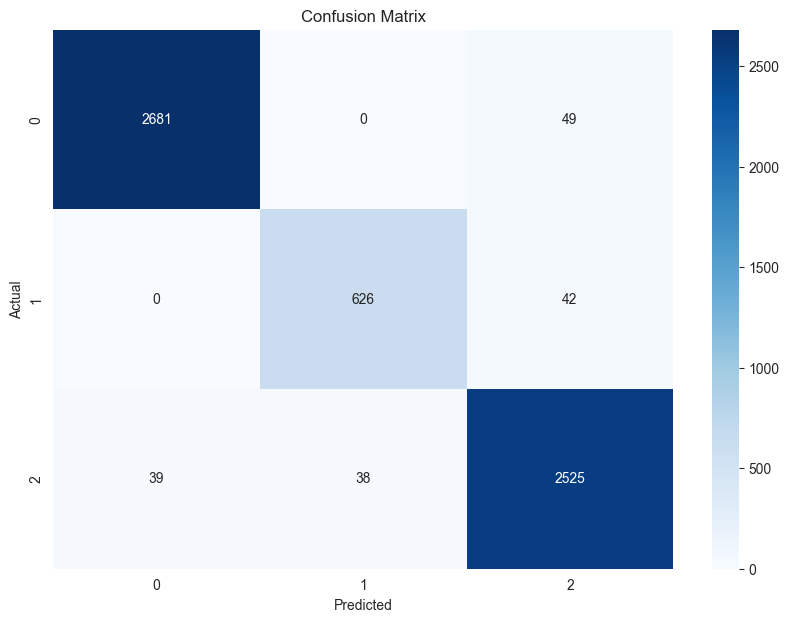

In [20]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(processed2_x_train, y_train)

_, dt_accuracy, dt_precision, dt_recall, dt_f1 = train_and_evaluate(dt_model, processed2_x_val, y_val)

# Podsumowanie

W przypadku klasyfikatora Naive Bayes, najlepsze wyniki uzyskano dla danych bez skalowania. Może to wynikać z faktu, że klasyfikator ten zakłada niezależność cech, a skalowanie danych może wprowadzić pewne zależności między nimi. 
W przypadku klasyfikatora Decision Tree dla bez skalowania i z wykorzystaniem Minmax oraz Standard Scalera wyniki były takie same. Może to wynikać z faktu, że klasyfikator ten jest odporny na skalowanie danych. 